In [1]:
import pandas
from datetime import datetime
import matplotlib.pyplot as plt
import numpy

In [2]:
with open('flask_critical_and_error_and_warning_and_info_and_debug.log','r') as fil:
    file_cont = fil.read().split('\n')

In [3]:
time_to_parse = file_cont[0].split('|')[0]
time_to_parse

'2020-05-15 15:25:00,116'

In [4]:
dt_obj = datetime.strptime(time_to_parse.split(',')[0], '%Y-%m-%d %H:%M:%S')
dt_obj

datetime.datetime(2020, 5, 15, 15, 25)

In [5]:
# https://stackoverflow.com/questions/11743019/convert-python-datetime-to-epoch-with-strftime
dt_obj.timestamp() + int(time_to_parse.split(',')[1])/1000

1589556300.116

In [6]:
for line in file_cont:
    line_as_list = line.split('|')
    if ('[trace page start' in line) or ('[trace page end' in line):
        print(line)

2020-05-15 15:25:06,951|controller.py|INFO |1420|navigation          |[trace page start 7539071]
2020-05-15 15:25:07,914|controller.py|INFO |1512|navigation          |[trace page end 7539071]
2020-05-15 15:25:12,843|controller.py|INFO |1230|index               |[trace page start 1425201]
2020-05-15 15:25:14,558|controller.py|INFO |1240|index               |[trace page end 1425201]
2020-05-15 15:25:18,752|controller.py|INFO |1420|navigation          |[trace page start 9040160]
2020-05-15 15:25:20,259|controller.py|INFO |1512|navigation          |[trace page end 9040160]
2020-05-15 15:25:22,081|controller.py|INFO |1566|show_all_derivations|[trace page start 1885086]
2020-05-15 15:25:26,767|controller.py|INFO |1588|show_all_derivations|[trace page end 1885086]
2020-05-15 15:28:39,808|controller.py|INFO |1420|navigation          |[trace page start 3514828]
2020-05-15 15:28:40,962|controller.py|INFO |1512|navigation          |[trace page end 3514828]
2020-05-15 15:28:44,717|controller.py|IN

In [7]:
list_of_page_dicts = []
list_of_dicts_for_this_page = []

for line in file_cont:
    line_as_list = line.split('|')
    if ('[trace page start' in line): #or ('[trace page end' in line):  
        print(line)
        dict_of_page = {}
        dict_of_page['page name'] = line_as_list[4].strip()
        
    elif ('[trace start' in line) or ('[trace end' in line):
        my_dict = {}
        # time stamp to float
        dt_obj = datetime.strptime(line_as_list[0].split(',')[0], '%Y-%m-%d %H:%M:%S') # https://strftime.org/
        my_dict['time'] = dt_obj.timestamp() + int(line_as_list[0].split(',')[1])/1000 
        my_dict['file'] = line_as_list[1].strip()
        my_dict['line'] = line_as_list[3].strip()
        my_dict['function'] = line_as_list[4].strip()
        my_dict['start or stop'] = line_as_list[5].split(' ')[1]
        my_dict['indx'] = line_as_list[5].split(' ')[2].replace(']','')
        list_of_dicts_for_this_page.append(my_dict)
#            print(len(list_of_dicts_for_this_page))
    elif ('[trace page end') in line:
#        print(line)
        df_start_stop = pandas.DataFrame(list_of_dicts_for_this_page)
#        print(df_start_stop.shape)
        dict_of_page['df start stop'] = df_start_stop
        list_of_page_dicts.append(dict_of_page)
        list_of_dicts_for_this_page = []


2020-05-15 15:25:06,951|controller.py|INFO |1420|navigation          |[trace page start 7539071]
2020-05-15 15:25:12,843|controller.py|INFO |1230|index               |[trace page start 1425201]
2020-05-15 15:25:18,752|controller.py|INFO |1420|navigation          |[trace page start 9040160]
2020-05-15 15:25:22,081|controller.py|INFO |1566|show_all_derivations|[trace page start 1885086]
2020-05-15 15:28:39,808|controller.py|INFO |1420|navigation          |[trace page start 3514828]
2020-05-15 15:28:44,717|controller.py|INFO |1566|show_all_derivations|[trace page start 8626747]
2020-05-15 15:28:51,553|controller.py|INFO |2776|review_derivation   |[trace page start 8518749]
2020-05-15 15:29:54,395|controller.py|INFO |1230|index               |[trace page start 9663545]


In [8]:
len(list_of_page_dicts)

8

In [9]:
list_of_page_dicts[0]['df start stop'].tail()

,file,function,indx,line,start or stop,time
27,compute.py,create_files_of_db_content,7300054,720,end,1.589556e+09
28,common_lib.py,read_db,2464236,64,start,1.589556e+09
29,common_lib.py,create_sql_connection,1691449,42,start,1.589556e+09
30,common_lib.py,create_sql_connection,1691449,46,end,1.589556e+09
31,common_lib.py,read_db,2464236,105,end,1.589556e+09


In [10]:
list(list_of_page_dicts[0]['df start stop']['time'].head())

[1589556306.959,
 1589556306.963,
 1589556306.969,
 1589556306.976,
 1589556306.994]

In [11]:
list_of_elapsed_time_dicts = []

for page_dict in list_of_page_dicts:
    new_dict = {}
    new_dict['page name'] = page_dict['page name']
    df_start_stop = page_dict['df start stop']
    list_of_dicts = []
    for indx_val in df_start_stop['indx'].unique():
        if df_start_stop[df_start_stop['indx']==indx_val].shape[0] == 2:
            my_dict = {}
            my_dict['elapsed'] = (df_start_stop[df_start_stop['indx']==indx_val]['time'].values[1] - 
                       df_start_stop[df_start_stop['indx']==indx_val]['time'].values[0])
            my_dict['file'] = df_start_stop[df_start_stop['indx']==indx_val]['file'].values[0]
            my_dict['function'] = df_start_stop[df_start_stop['indx']==indx_val]['function'].values[0]
            my_dict['line'] = df_start_stop[df_start_stop['indx']==indx_val]['line'].values[0]
            # https://stackoverflow.com/questions/11865458/how-to-get-unix-timestamp-from-numpy-datetime64
            my_dict['start'] = (df_start_stop[df_start_stop['indx']==indx_val]['time'].values[0])
            list_of_dicts.append(my_dict)
        else:
            print(indx_val + ' is missing pair')
            print(df_start_stop[df_start_stop['indx']==indx_val])
    df = pandas.DataFrame(list_of_dicts)
    new_dict['df'] = df
    list_of_elapsed_time_dicts.append(new_dict)

8834885 is missing pair
                                  file       function     indx line  \
534  validate_inference_rules_sympy.py  validate_step  8834885   79   

    start or stop          time  
534         start  1.589557e+09  
8411803 is missing pair
                                  file       function     indx line  \
575  validate_inference_rules_sympy.py  validate_step  8411803   79   

    start or stop          time  
575         start  1.589557e+09  
8235036 is missing pair
                                  file       function     indx line  \
580  validate_inference_rules_sympy.py  validate_step  8235036   79   

    start or stop          time  
580         start  1.589557e+09  
4172884 is missing pair
                                  file       function     indx line  \
585  validate_inference_rules_sympy.py  validate_step  4172884   79   

    start or stop          time  
585         start  1.589557e+09  
1452729 is missing pair
                                  fi

In [12]:
df.head()

,elapsed,file,function,line,start
0,0.126,compute.py,create_d3js_json,2471,1.589557e+09
1,0.030,common_lib.py,read_db,64,1.589557e+09
2,0.007,common_lib.py,create_sql_connection,42,1.589557e+09
3,0.035,compute.py,list_expr_in_derivation,2383,1.589557e+09
4,0.022,common_lib.py,read_db,64,1.589557e+09


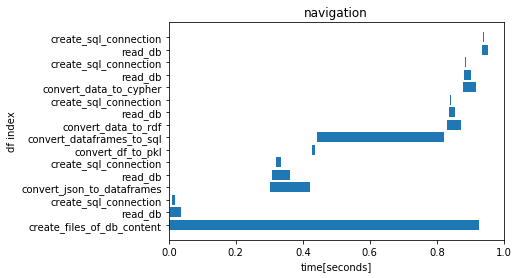

function
convert_df_to_pkl             0.010
create_sql_connection         0.034
convert_data_to_cypher        0.040
convert_data_to_rdf           0.040
convert_json_to_dataframes    0.120
read_db                       0.144
convert_dataframes_to_sql     0.380
create_files_of_db_content    0.926
Name: elapsed, dtype: float64


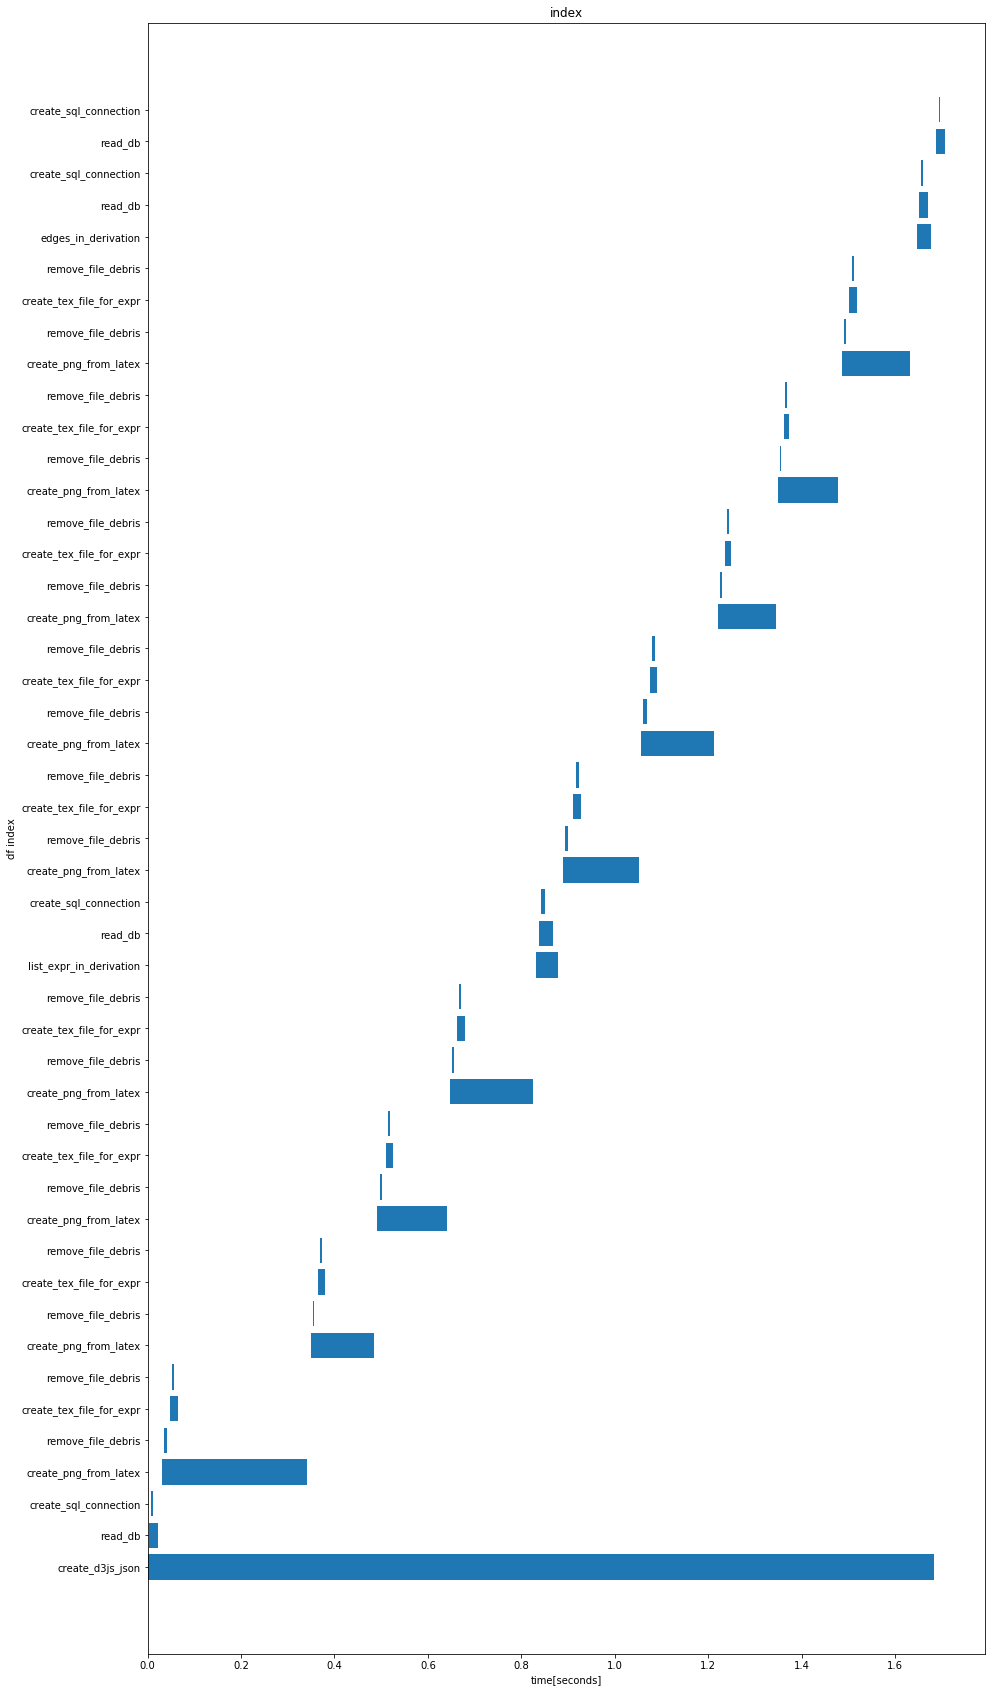

function
create_sql_connection       0.018000
edges_in_derivation         0.031000
list_expr_in_derivation     0.048000
remove_file_debris          0.079999
read_db                     0.088000
create_tex_file_for_expr    0.138000
create_png_from_latex       1.492000
create_d3js_json            1.683000
Name: elapsed, dtype: float64


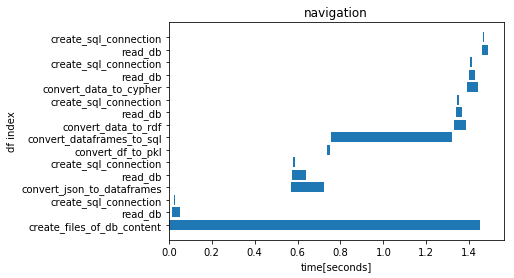

function
convert_df_to_pkl             0.012
create_sql_connection         0.032
convert_data_to_cypher        0.050
convert_data_to_rdf           0.054
convert_json_to_dataframes    0.152
read_db                       0.186
convert_dataframes_to_sql     0.567
create_files_of_db_content    1.451
Name: elapsed, dtype: float64


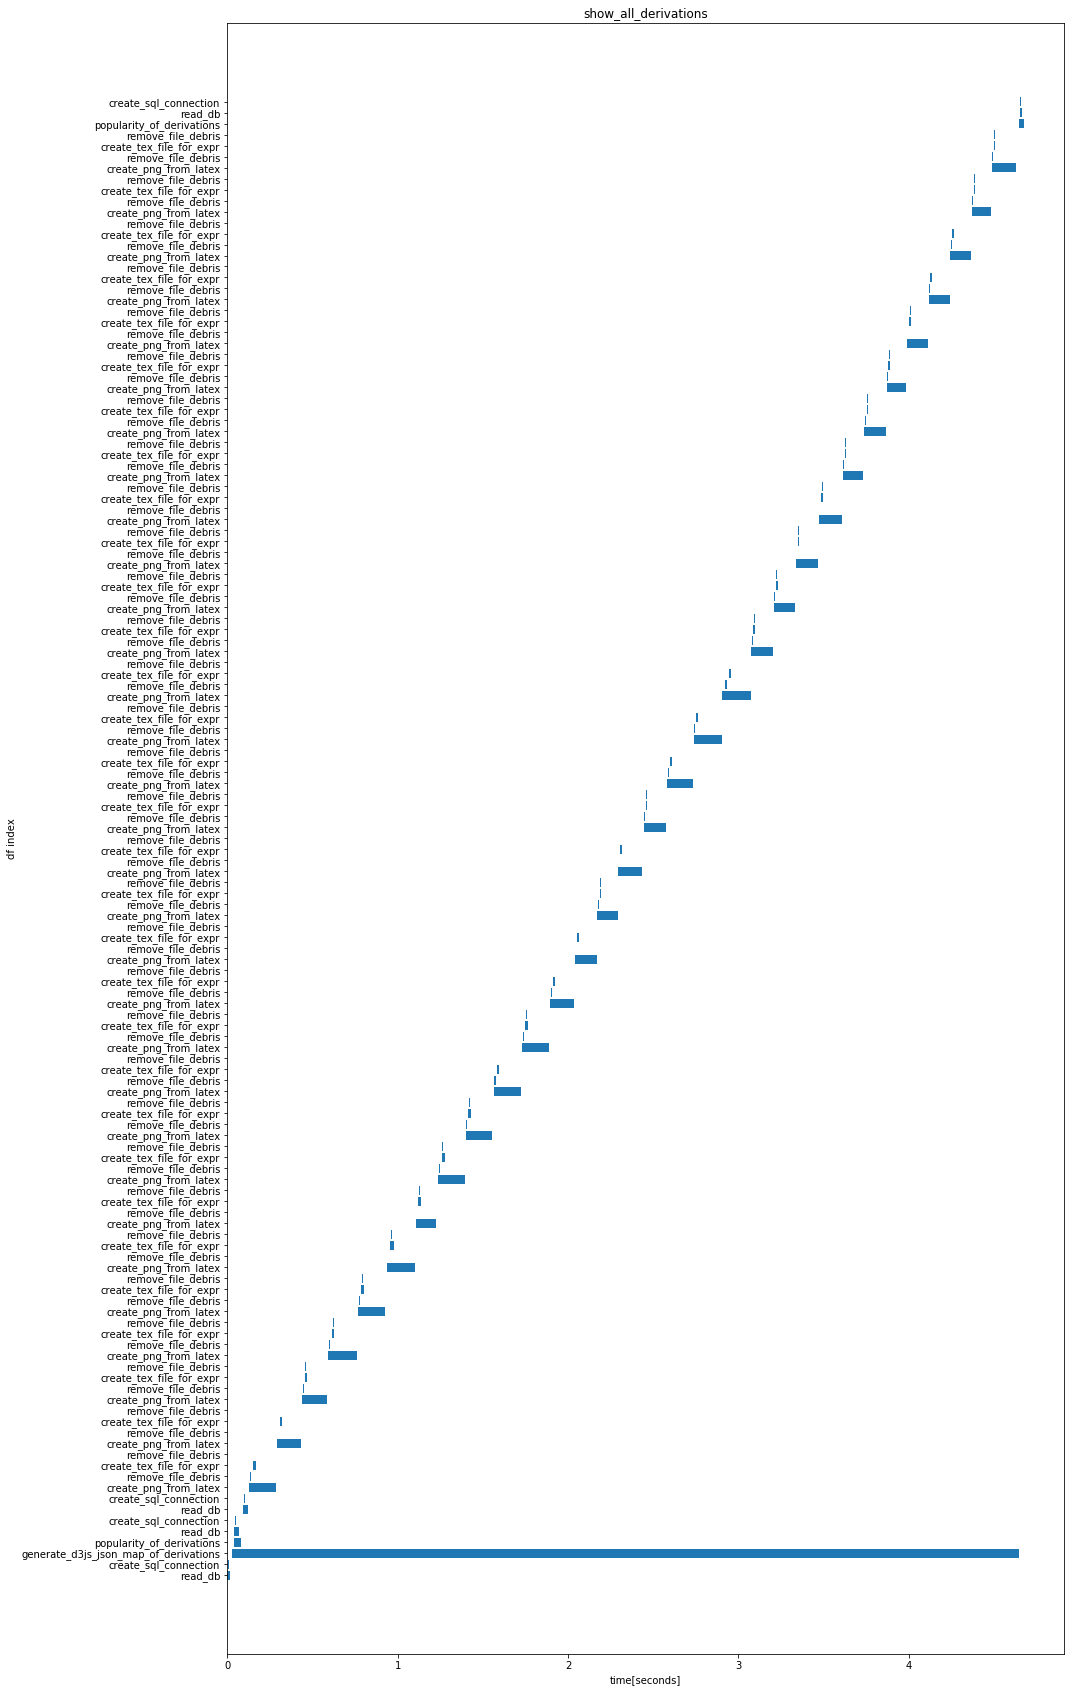

function
create_sql_connection                    0.020000
popularity_of_derivations                0.074000
read_db                                  0.089000
remove_file_debris                       0.272000
create_tex_file_for_expr                 0.390001
create_png_from_latex                    4.349001
generate_d3js_json_map_of_derivations    4.614000
Name: elapsed, dtype: float64


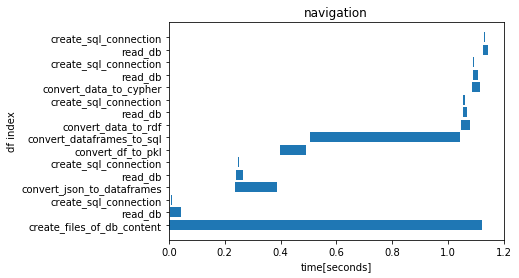

function
create_sql_connection         0.020
convert_data_to_cypher        0.031
convert_data_to_rdf           0.031
convert_df_to_pkl             0.096
read_db                       0.115
convert_json_to_dataframes    0.150
convert_dataframes_to_sql     0.538
create_files_of_db_content    1.122
Name: elapsed, dtype: float64


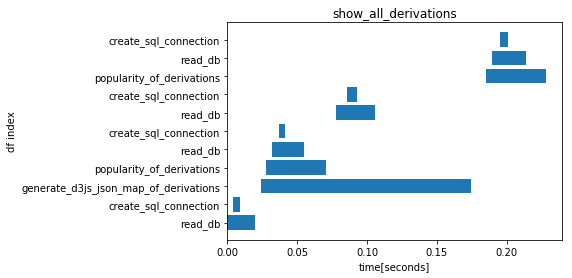

function
create_sql_connection                    0.022
popularity_of_derivations                0.086
read_db                                  0.096
generate_d3js_json_map_of_derivations    0.150
Name: elapsed, dtype: float64


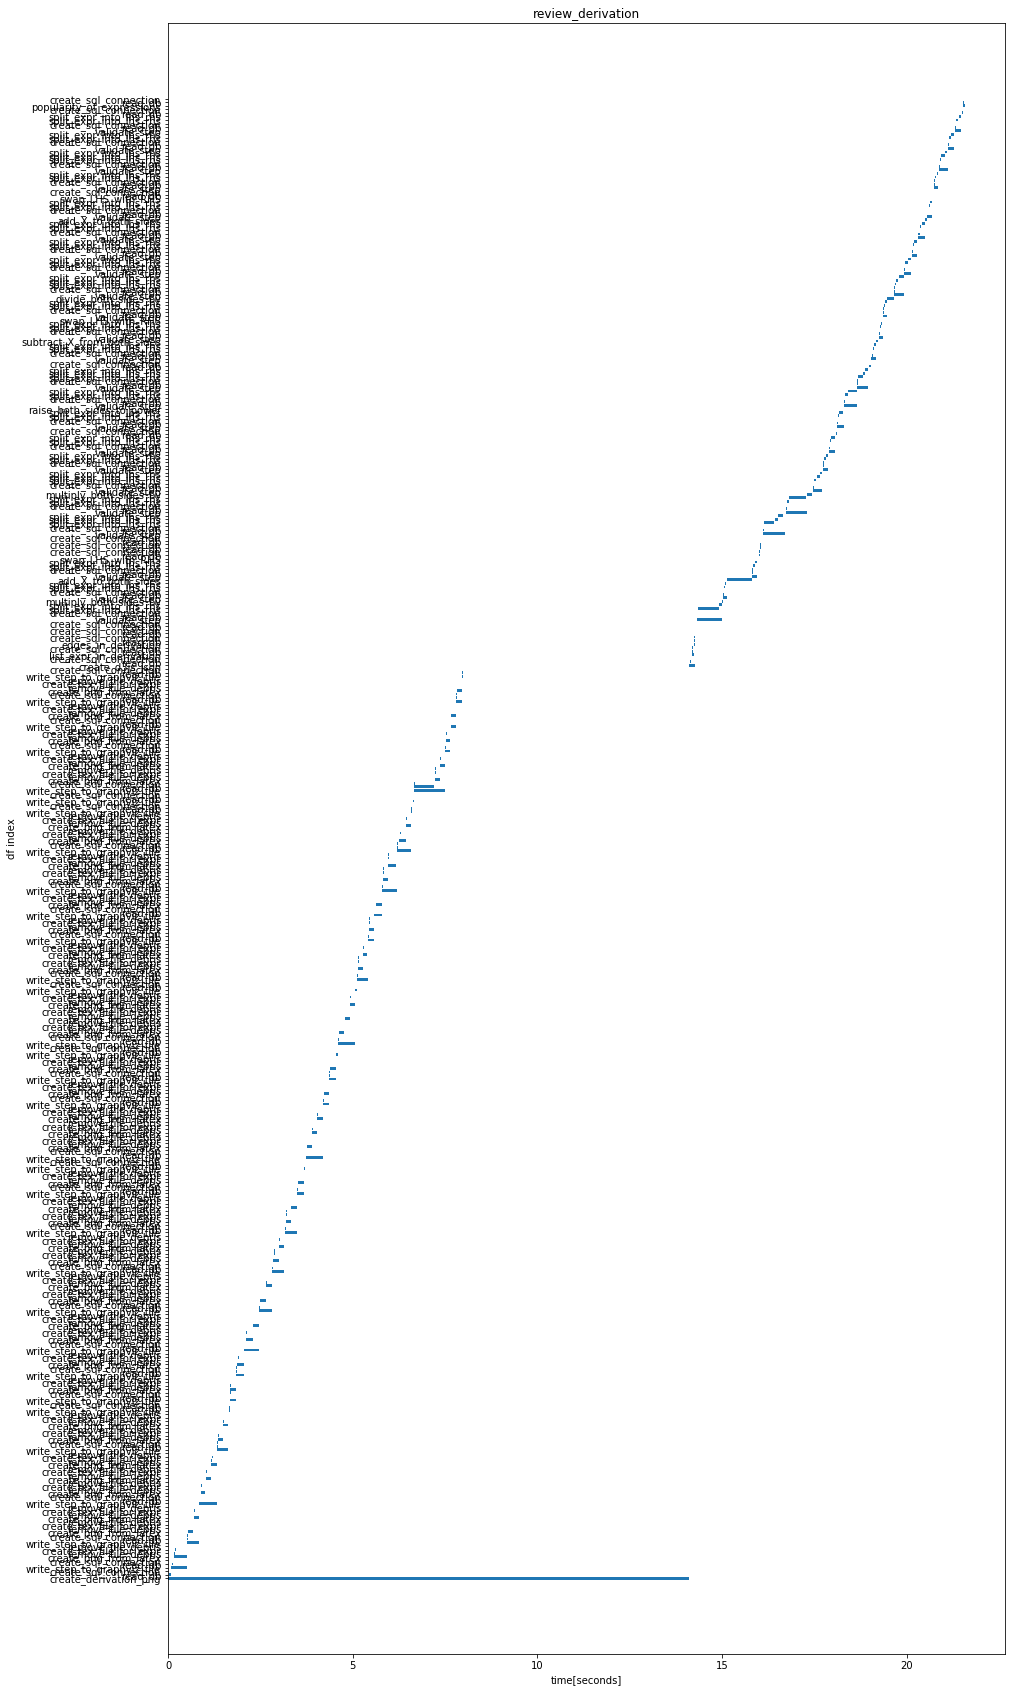

function
raise_both_sides_to_power       0.006000
swap_LHS_with_RHS               0.025000
edges_in_derivation             0.028000
subtract_X_from_both_sides      0.051000
list_expr_in_derivation         0.058000
popularity_of_expressions       0.059000
multiply_both_sides_by          0.137000
create_d3js_json                0.165000
divide_both_sides_by            0.175000
create_sql_connection           0.333001
remove_file_debris              0.367000
create_tex_file_for_expr        0.544000
add_X_to_both_sides             0.734000
read_db                         2.036999
split_expr_into_lhs_rhs         4.310000
validate_step                   5.472000
create_png_from_latex           5.988000
write_step_to_graphviz_file     7.737001
create_derivation_png          14.090000
Name: elapsed, dtype: float64


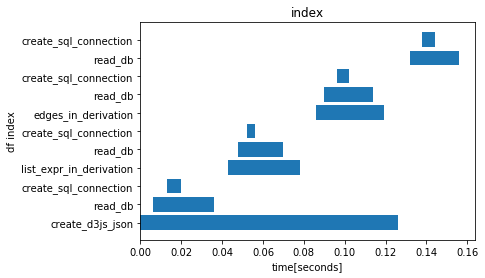

function
create_sql_connection      0.023
edges_in_derivation        0.033
list_expr_in_derivation    0.035
read_db                    0.100
create_d3js_json           0.126
Name: elapsed, dtype: float64


In [13]:
for etimedict in list_of_elapsed_time_dicts:
    df = etimedict['df']
        
    if len(list(df['start'].index))>30:
        plt.figure(figsize=(15,30))
    else:
        plt.figure()
    plt.barh(y=list(df['start'].index), 
         left=list(df['start'].values  - min(df['start'].values)), 
         width=list(df['elapsed'].values))
    plt.xlabel('time[seconds]');
    plt.ylabel('df index');
    # https://stackoverflow.com/questions/7559242/matplotlib-strings-as-labels-on-x-axis
    plt.yticks(range(len(list(df['function']))), list(df['function']));
    plt.title(etimedict['page name']);
    plt.show();
    print(df.groupby('function')['elapsed'].sum().sort_values())
